In [ ]:
%load_ext autoreload
%autoreload 2

In [19]:
from absbox import API

In [33]:
localAPI = API("https://absbox.org/api/dev")
#localAPI = API("http://localhost:8081")

library_url = "https://absbox.org/library/latest"
#library_url = "http://localhost:5008"

localAPI.safeLogin("trial",deal_library=library_url)

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅Connected, local lib:0.19.1, server:0.19.8

········


✅ login successfully,Login successfully with expire at 2023-08-30

In [21]:
rs = localAPI.listLibrary(deal_library=library_url,read=True,production=False)

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅list success

In [22]:
rs[rs.Date==20230719]

,DealID,DealName,Status,Num,Date,Tags,TimeStamp
3,22JSD03,吉时代2022年第三期个人汽车抵押贷款资产支持证券,PRODUCTION,10,20230719,"REGRESSION,AUTO,TRIAL","Tue, 25 Jul 2023 03:20:32 GMT"
5,23JSD01,吉时代2023年第一期个人汽车抵押贷款资产支持证券,PRODUCTION,4,20230719,"AUTO,TRIAL","Thu, 27 Jul 2023 00:10:19 GMT"
6,23JSD02,吉时代2023年第二期个人汽车抵押贷款资产支持证券,PRODUCTION,1,20230719,"AUTO,TRIAL","Thu, 27 Jul 2023 01:00:57 GMT"
9,22JSD05,吉时代2022年第五期个人汽车抵押贷款资产支持证券,PRODUCTION,7,20230719,"AUTO,TRIAL","Thu, 27 Jul 2023 12:35:26 GMT"
10,22JSD04,吉时代2022年第四期个人汽车抵押贷款绿色资产支持证券,PRODUCTION,9,20230719,"AUTO,TRIAL","Thu, 27 Jul 2023 12:49:44 GMT"


In [113]:
pricing_curve_base = {"贴现日":"2023-08-05","贴现曲线":[["2023-01-01",0.01473]
                                                    ,["2023-08-15",0.02018]
                                                    ,["2023-08-30",0.02066]
                                                    ,["2023-10-30",0.020980]
                                                    ,["2024-01-30",0.021990]
                                                    ,["2024-04-30",0.02280]
                                                    ,["2024-07-30",0.023370]
                                                    ,["2025-07-30",0.0265]]}

In [169]:
pricing_curve_base

{'贴现日': '2023-08-05',
 '贴现曲线': [['2023-01-01', 0.01473],
  ['2023-08-15', 0.02018],
  ['2023-08-30', 0.02066],
  ['2023-10-30', 0.02098],
  ['2024-01-30', 0.02199],
  ['2024-04-30', 0.0228],
  ['2024-07-30', 0.02337],
  ['2024-07-30', 0.02337],
  ['2025-07-30', 0.0265]]}

In [114]:
up_20 = {"贴现曲线": [[d,v*1.2] for d,v in pricing_curve_base['贴现曲线']]}

In [131]:
pricing_curve_up = {"贴现日":"2023-08-05"} | up_20

In [134]:
pricing_curves = [pricing_curve_base ,pricing_curve_up ]
cprs = [{"CPR":0.0436}, {"CPR":0.0310}]
cdr = {"CDR":0.001}

scenarios = {k:(p,[c,cdr]) for k,p,c in  
              zip(["高CPR","低CPR"],pricing_curves,cprs) }

scenarios

{'高CPR': ({'贴现日': '2023-08-05',
   '贴现曲线': [['2023-01-01', 0.01473],
    ['2023-08-15', 0.02018],
    ['2023-08-30', 0.02066],
    ['2023-10-30', 0.02098],
    ['2024-01-30', 0.02199],
    ['2024-04-30', 0.0228],
    ['2024-07-30', 0.02337],
    ['2024-07-30', 0.02337],
    ['2025-07-30', 0.0265]]},
  [{'CPR': 0.0436}, {'CDR': 0.001}]),
 '低CPR': ({'贴现日': '2023-08-05',
   '贴现曲线': [['2023-01-01', 0.017676],
    ['2023-08-15', 0.024215999999999998],
    ['2023-08-30', 0.024792],
    ['2023-10-30', 0.025175999999999997],
    ['2024-01-30', 0.026387999999999998],
    ['2024-04-30', 0.02736],
    ['2024-07-30', 0.028043999999999996],
    ['2024-07-30', 0.028043999999999996],
    ['2025-07-30', 0.031799999999999995]]},
  [{'CPR': 0.031}, {'CDR': 0.001}])}

In [179]:
run_list = ["22JSD03","22JSD05","23JSD01","23JSD02"]
r = {deal:
     {k:localAPI.runLibrary(deal
                    ,deal_library=library_url
                    ,pricing = s[0]
                    ,assump = s[1]
                    ,reader="china.SPV"
                    ,production=True
                    ,read=True)
           for k,s in scenarios.items()}
       for deal in run_list}

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅run success with deal id=22JSD03/report num=10,doc_id=64becf00945fe1aa4ff0c073

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅run success with deal id=22JSD03/report num=10,doc_id=64becf00945fe1aa4ff0c073

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅run success with deal id=22JSD05/report num=7,doc_id=64c1f40e945fe1aa4ff0c09f

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅run success with deal id=22JSD05/report num=7,doc_id=64c1f40e945fe1aa4ff0c09f

✅run success with deal id=23JSD01/report num=4,doc_id=64c1456b945fe1aa4ff0c087

✅run success with deal id=23JSD01/report num=4,doc_id=64c1456b945fe1aa4ff0c087

✅run success with deal id=23JSD02/report num=1,doc_id=64c15149945fe1aa4ff0c091

✅run success with deal id=23JSD02/report num=1,doc_id=64c15149945fe1aa4ff0c091

In [180]:
r['23JSD02']['高CPR']['bonds']['优先A2级']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2023-08-26,2.165739e+09,4890424.21,1.560680e+08,0.0248,1.609584e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2023-09-26,2.056947e+09,4561698.03,1.087916e+08,0.0248,1.133533e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2023-10-26,1.951575e+09,4192790.44,1.053715e+08,0.0248,1.095643e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2023-11-26,1.847826e+09,4110605.96,1.037498e+08,0.0248,1.078604e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2023-12-26,1.745863e+09,3766526.68,1.019622e+08,0.0248,1.057287e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2024-01-26,1.648639e+09,3677314.50,9.722451e+07,0.0248,1.009018e+08,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2024-02-26,1.559312e+09,3472530.38,8.932669e+07,0.0248,9.279922e+07,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2024-03-26,1.473597e+09,3072485.88,8.571515e+07,0.0248,8.878763e+07,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."
2024-04-26,1.388674e+09,3103839.53,8.492305e+07,0.0248,8.802689e+07,"[<PayInt:[""\20248\20808A2\32423""]>, <PayPrin:[..."


In [181]:
data = []
for deal,v in r.items():
    for scen,_v in v.items():
        data.append({"产品":deal,"场景":scen}|_v['pricing'].loc['优先A2级'].to_dict())
pd.DataFrame(data)

,产品,场景,估值,票面估值,WAL,久期,凸性,应计利息
0,22JSD03,高CPR,1.029567e+09,51.737033,0.52,0.44,0.81,0.0
1,22JSD03,低CPR,1.027219e+09,51.619044,0.53,0.45,0.82,0.0
2,22JSD05,高CPR,1.481490e+09,63.311553,0.78,0.67,1.38,0.0
3,22JSD05,低CPR,1.476412e+09,63.094538,0.79,0.67,1.39,0.0
4,23JSD01,高CPR,1.765918e+09,77.114330,0.77,0.63,1.40,0.0
5,23JSD01,低CPR,1.759931e+09,76.852895,0.78,0.64,1.40,0.0
6,23JSD02,高CPR,2.327469e+09,91.813358,0.84,0.65,1.67,0.0
7,23JSD02,低CPR,2.318688e+09,91.466963,0.85,0.67,1.68,0.0


In [158]:
pd.DataFrame([{"产品":deal,"场景":scen,"DN":_v['_deal']['contents']['name']}| _v['pricing'].loc['优先A2级'].to_dict()
                for scen,_v in v.items()
                for deal,v in r.items()]
            )

,产品,场景,DN,估值,票面估值,WAL,久期,凸性,应计利息
0,22JSD03,高CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.327469e+09,116.958222,0.84,0.65,1.67,0.0
1,22JSD05,高CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.327469e+09,116.958222,0.84,0.65,1.67,0.0
2,23JSD01,高CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.327469e+09,116.958222,0.84,0.65,1.67,0.0
3,23JSD02,高CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.327469e+09,116.958222,0.84,0.65,1.67,0.0
4,22JSD03,低CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.318688e+09,116.516960,0.85,0.67,1.68,0.0
5,22JSD05,低CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.318688e+09,116.516960,0.85,0.67,1.68,0.0
6,23JSD01,低CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.318688e+09,116.516960,0.85,0.67,1.68,0.0
7,23JSD02,低CPR,吉时代2023年第二期个人汽车抵押贷款资产支持证券,2.318688e+09,116.516960,0.85,0.67,1.68,0.0


In [188]:
def flow_by_scenario(rs, flowpath, node="col", rtn_df=True, rnd=2):
    "pull flows from multiple scenario"
    r = None
    ax = None
    if node=="col":
        r = {k:query(v,flowpath[:-1])[flowpath[-1]] for k,v  in rs.items()}    
        ax = 1
    elif node=="idx":
        r = {k:query(v,flowpath[:-1]).loc[flowpath[-1]] for k,v  in rs.items()}    
        ax = 0
    else:
        r = {k:query(v,flowpath) for k,v in rs.items()}
    if rtn_df:
        _vs = list(r.values())
        _ks = list(r.keys())
        r = pd.concat(_vs,keys=_ks,axis=ax) 
    return r

dict_keys(['22JSD03', '22JSD05', '23JSD01', '23JSD02'])

<AxesSubplot:xlabel='Date', ylabel='Principal & Interest'>

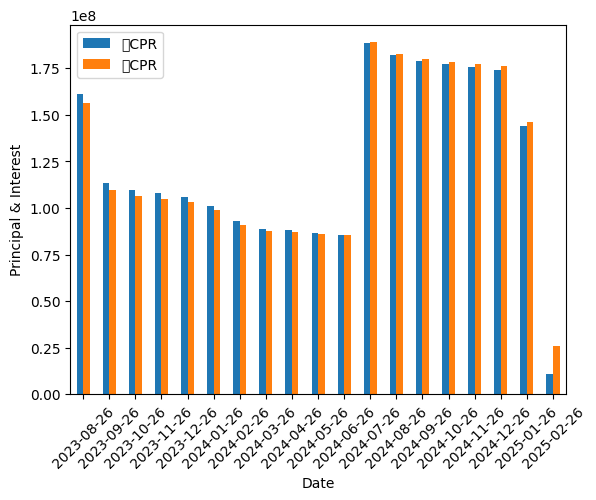

In [196]:
flow_by_scenario(r['23JSD02'],["bonds",'优先A2级',"本息合计"]).plot.bar(xlabel="Date",ylabel="Principal & Interest",rot=45)

In [ ]:
#日期	       O/N	   1W	   2W	   1M	   3M	   6M	  9M	1Y
#2023-07-28	1.4730	1.8260	2.0180	2.0660	2.0980	2.1990	2.2800	2.3370
{"贴现日":"2023-08-05","贴现曲线":[["2023-01-01",0.01473]
                                ,["2023-08-15",0.02018]
                                ,["2023-08-30",0.02066]
                                ,["2023-10-30",0.020980]
                                ,["2024-01-30",0.021990]
                                ,["2024-04-30",0.02280]
                                ,["2024-07-30",0.023370]
                                ,["2024-07-30",0.023370]
                                ,["2025-07-30",0.0265]]

In [183]:
from absbox.local.component import flow_by_scenario
from pyspecter import query

In [168]:
#localAPI = API("https://absbox.org/api/dev")
localAPI = API("http://localhost:8081")

#library_url = "https://absbox.org/library/latest"
library_url = "http://localhost:5008"

localAPI.safeLogin("trial",deal_library=library_url)

✅Connected, local lib:0.19.1, server:0.19.8

········


✅ login successfully,Login successfully with expire at 2023-08-30

In [178]:
#cprs = [{"CPR":0.0436}, {"CPR":0.0310}]
#cdr = {"CDR":0.001}

tt = localAPI.runLibrary("23JSD02"
                 ,deal_library=library_url
                 ,pricing = pricing_curve_base
                 ,assump = [{"CDR":0.001},{"CPR":0.0436}]
                 ,reader="china.SPV"
                 ,production=True
                 ,read=True)

/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

✅run success with deal id=23JSD02/report num=1,doc_id=64c15149945fe1aa4ff0c091

In [176]:
tt['pricing']

,估值,票面估值,WAL,久期,凸性,应计利息
优先A1级,1.180260e+09,73.766278,0.47,0.40,0.73,0
优先A2级,2.327469e+09,116.958222,0.84,0.65,1.67,0
次级,7.359770e+08,110.672313,1.99,1.90,6.24,0
